### Importing Libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import pytesseract

### Image Reading

In [2]:
path='D:\Programming\car1.jpeg'
img=cv2.imread(path)

### RGB to Grayscale

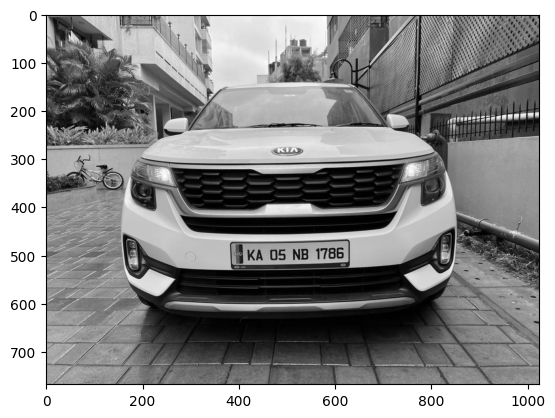

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Filtered Out Images

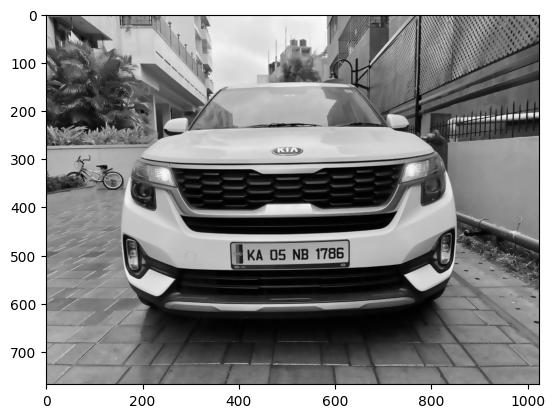

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Smoothning Filter
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))

### Edge Detection

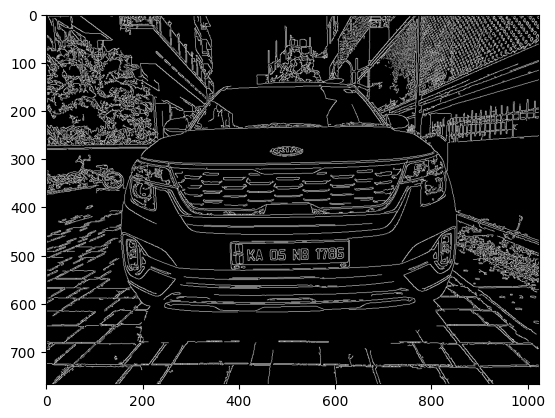

In [5]:
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

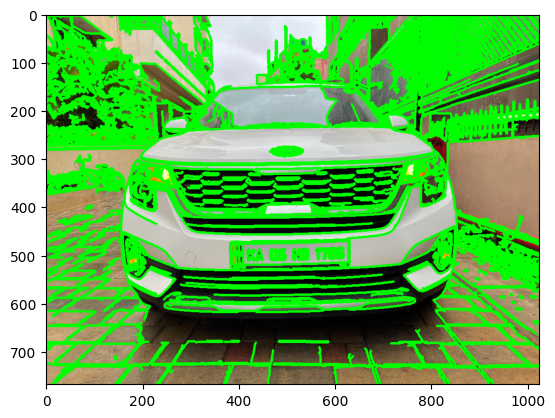

In [6]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=img.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

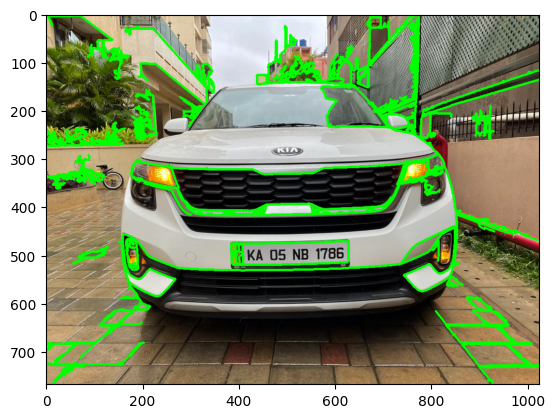

In [7]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = img.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

In [8]:
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx
                x,y,w,h = cv2.boundingRect(c) 
                new_img=img[y:y+h,x:x+w]
                i+=1
                break

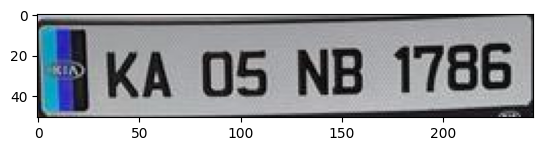

In [9]:
plt.imshow(new_img)

In [11]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3)
cv2.imshow("image with detected license plate", img)
cv2.waitKey(0)

-1

In [13]:
text = pytesseract.image_to_string(new_img)
print(f"License Plate Number is: {text}")

License Plate Number is: 8 KA 05 NB 1786

